<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/Examens/Entrega_26Apr_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega de Métodos Numéricos I
====


Este programa genera números aleatorios que están distribuidos como una distribución de Cauchy usando el método Monte Carlo. Se piden resultados intermedios y se representan los números generados en dos gráficas.


**1. Importa las librerías numpy, scipy.stats y matplotlib.pyplot.**


















In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

**2. Obten 50 números espaciados uniformemente entre -4 y 4. Escribe la media, mediana, desviación estándar y varianza de estos números.**






In [2]:
x = np.linspace(-4, 4)
# Printing values for x
mean = np.mean(x)
median = np.median(x)
sd = np.std(x)
variance = np.var(x)

print (len(x))
print ("Mean", mean) # -2.842170943040401e-16
print ("Median", median) # 0.0
print ("Standard Deviation", sd) # 2.356060357495806
print ("Variance", variance) # 5.551020408163265



50
Mean -2.842170943040401e-16
Median 0.0
Standard Deviation 2.356060357495806
Variance 5.551020408163265


**3. Accede a la distribución de Cauchy a partir de scipy y escribe la media, la desviación estándar, la distribución cumulativa en 0 y 
el máximo de esta distribución.**


In [3]:
mean, var, skew, kurt = ss.cauchy.stats(moments='mvsk')

In [5]:
dist = ss.cauchy()

mCauchy = dist.mean()
mStd = dist.std()
cumCauch = dist.cdf(0)
upper = dist.pdf(0)

print ("Mean Cauchy distribution", mCauchy) # nan
print ("Standard Deviation Cauchy distribution", mStd) # nan
print ("Cumulative distribution at 0 Cauchy distribution", cumCauch) # 0.5
print ("Maximum Cauchy distribution", upper) # 0.3183098861837907

Mean Cauchy distribution nan
Standard Deviation Cauchy distribution nan
Cumulative distribution at 0 Cauchy distribution 0.5
Maximum Cauchy distribution 0.3183098861837907


**4. Para los 50 números espaciados uniformemente entre -4 y 4, dibuja la correspodiente distribución de Cauchy e indica en una gráfica donde se aceptarán y se rechazarán valores de la ordenada en el método Monte Carlo.**



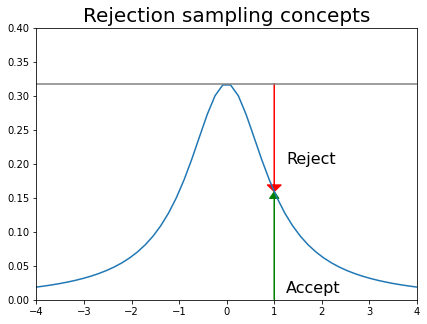

In [6]:
# Posible método

dist_cauchy = ss.cauchy()
upper = dist_cauchy.pdf(0)
x_sergio = np.linspace(-4, 4, 50)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_sergio, dist_cauchy.pdf(x_sergio))
plt.axhline(upper, color='grey')
px = 1.0
plt.arrow(px,0,0,dist_cauchy.pdf(1.0)-0.01, linewidth=1,
                    head_width=0.2, head_length=0.01, fc='g', ec='g')
plt.arrow(px,upper,0,-(upper-dist_cauchy.pdf(px)-0.01), linewidth=1,
                    head_width=0.3, head_length=0.01, fc='r', ec='r')
plt.text(px+.25, 0.2, 'Reject', fontsize=16)
plt.text(px+.25, 0.01, 'Accept', fontsize=16)
plt.axis([-4,4,0,0.4])
plt.title('Rejection sampling concepts', fontsize=20)
plt.show()


**5. Genera números aleatorios distribuidos uniformemente entre -4 y 4. A partir de qué potencia de 10 el error en la desviación estándar es menor que 2 por mil.**







In [8]:
# Posible método
i = 1
truth_std = 8./np.sqrt(12)

while True:
  u = np.random.uniform(-4,4,pow(10,i))
  err = abs(u.std() - truth_std)
  if err < 0.002:
    break
  else:
    i+=1
  
print("Para N = 10^{} el error es {}".format(i,err))
  
  

Para N = 10^5 el error es 0.0013863810218888162


**6. Genera números aleatorios entre 0 y el máximo de la distribución de Cauchy y acepta únicamente aquellos que satisfacen la condición Monte Carlo. Escribe la media y la desviación estándar de la distribución de los números aceptados.**


In [10]:
# accept-reject criterion for each point in sampling distribution
n = 10**5
r = np.random.uniform(0, upper, n)
# accepted points will come from target (Cauchy) distribution
v = u[r < dist.pdf(u)]
print ("Mean accepted points", v.mean()) # |mean| < 0.01
print ("Standard Deviation accepted points", v.std()) # < 1.42

Mean accepted points -0.010821418648042602
Standard Deviation accepted points 1.41725090439274


**7. Dibuja en una gráfica la distribución de Cauchy de los números espaciados uniformemente entre -4 y 4 del principio junto al histograma de los números generados según la distribución de Cauchy de 6 teniendo en cuenta que el área del histograma de los números de 6 debe de coincidir con el área de la distribución de Cauchy en tal intervalo.**


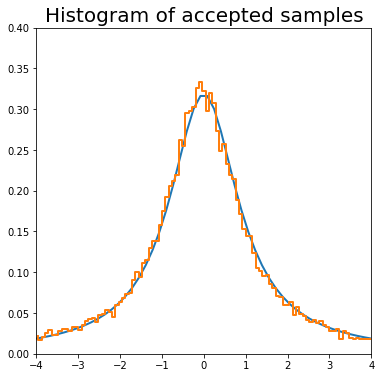

In [19]:
plt.figure(figsize=(6,6))
plt.plot(x, dist.pdf(x), linewidth=2)

# Plot scaled histogram
factor = dist.cdf(4) - dist.cdf(-4)
hist, bin_edges = np.histogram(v, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, factor*hist, linewidth=2)
plt.axis([-4,4,0,0.4])
plt.title('Histogram of accepted samples', fontsize=20);
plt.show()
